# Adaptive Row Activation and Refresh
# an Experimental Approach to Mitigate RowHammer

Nevzat Umut Demirseren\
School of Computing\
University of North Florida\
Jacksonville, Florida\
nevzatumut2001@gmail.com

Required packages for the project (may require installation)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt 
import math

## Read and Analyze Data

### Read Data

In [3]:
output_no_mitigation = pd.read_csv('../outputs/output_no_mitigation.csv')

In [4]:
output_target_row_refresh_range1 = pd.read_csv('../outputs/output_target_row_refresh_range1.csv')

In [5]:
output_target_row_refresh_range2 = pd.read_csv('../outputs/output_target_row_refresh_range2.csv')

In [6]:
output_probabilistic_adjacent_row_activation_range1 = pd.read_csv('../outputs/output_probabilistic_adjacent_row_activation_range1.csv')

In [7]:
output_probabilistic_adjacent_row_activation_range2 = pd.read_csv('../outputs/output_probabilistic_adjacent_row_activation_range2.csv')

In [8]:
output_adaptive_row_activation_and_refresh = pd.read_csv('../outputs/output_adaptive_row_activation_and_refresh.csv')

### Display Data

For the simulation, rows 3 and 5 are chosen as the aggressor rows and 4 as the victim row

In [9]:
display(output_no_mitigation)

,real_time,simulation_time_ns,total_access_count,flip_count
0,0,63,2,0
1,1,824,28,0
2,2,3961,132,0
3,3,7451,248,0
4,4,10830,362,0
...,...,...,...,...
295,295,1077772,35928,10
296,296,1080946,36036,10
297,297,1084669,36160,10
298,298,1088628,36290,10


In [10]:
display(output_target_row_refresh_range1)

,real_time,simulation_time_ns,total_access_count,trr_count,flip_count
0,0,102,2,0,0
1,1,5361,110,0,0
2,2,11669,238,0,0
3,3,18087,368,0,0
4,4,24447,498,0,0
...,...,...,...,...,...
295,295,1824607,36928,40,5
296,296,1830354,37046,40,5
297,297,1836659,37174,40,5
298,298,1843013,37304,40,5


In [11]:
display(output_target_row_refresh_range2)

,real_time,simulation_time_ns,total_access_count,trr_count,flip_count
0,0,93,2,0,0
1,1,5495,112,0,0
2,2,11698,236,0,0
3,3,17956,364,0,0
4,4,24395,494,0,0
...,...,...,...,...,...
295,295,1839619,36954,78,0
296,296,1845823,37080,78,0
297,297,1850947,37184,78,0
298,298,1857312,37314,78,0


In [12]:
display(output_probabilistic_adjacent_row_activation_range1)

,real_time,simulation_time_ns,total_access_count,para_count,flip_count
0,0,70,2,0,0
1,1,4101,122,0,0
2,2,8921,252,1,0
3,3,13144,366,2,0
4,4,17810,472,5,0
...,...,...,...,...,...
295,295,1383208,36952,344,5
296,296,1387610,37082,344,5
297,297,1392021,37212,344,5
298,298,1396501,37334,345,5


In [13]:
display(output_probabilistic_adjacent_row_activation_range2)


,real_time,simulation_time_ns,total_access_count,para_count,flip_count
0,0,65,2,0,0
1,1,7420,132,8,0
2,2,11865,262,8,0
3,3,16958,390,10,0
4,4,21027,510,10,0
...,...,...,...,...,...
295,295,1516974,36762,726,0
296,296,1521039,36880,726,0
297,297,1527616,37008,732,0
298,298,1532467,37128,734,0


In [14]:
display(output_adaptive_row_activation_and_refresh)

,real_time,simulation_time_ns,total_access_count,arar_count,flip_count
0,0,61,2,0,0
1,1,5304,132,1,0
2,2,10543,262,2,0
3,3,15775,392,3,0
4,4,21544,522,5,0
...,...,...,...,...,...
295,295,1684745,36804,792,0
296,296,1690303,36932,794,0
297,297,1696719,37062,798,0
298,298,1701642,37174,800,0


### Visualize Data

#### No Mitigations

Best fitting line: y = 0.03332815731853558 * x + 2.1465308741863867


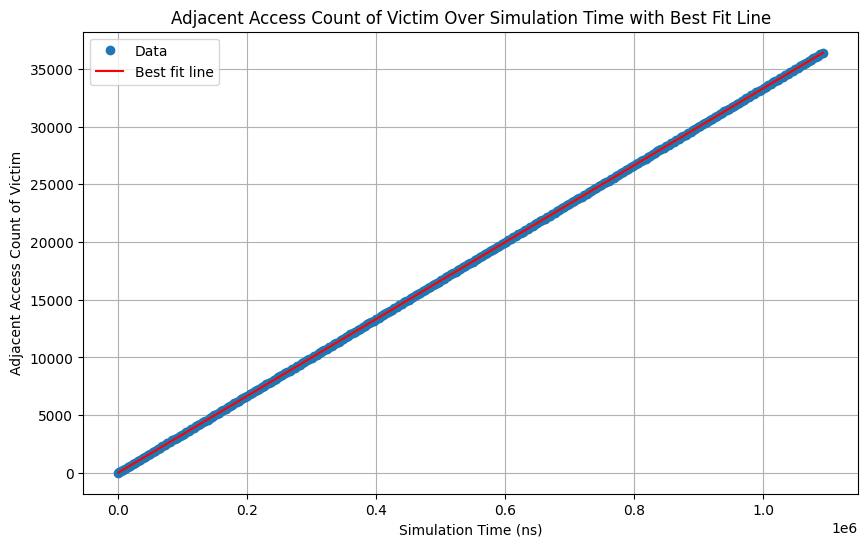

In [15]:
# Extract the columns
x = output_no_mitigation['simulation_time_ns']
y = output_no_mitigation['total_access_count']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [16]:
flip_count = output_no_mitigation['flip_count']
simulation_time_ns = output_no_mitigation['simulation_time_ns']

for i in range(1, len(flip_count)):
    if flip_count[i - 1] < flip_count[i]:
        print("Flip " + str(flip_count[i]) + " occured at " + str(simulation_time_ns[i]) + " ns")

Flip 1 occured at 124178 ns
Flip 2 occured at 134654 ns
Flip 3 occured at 166424 ns
Flip 4 occured at 183292 ns
Flip 5 occured at 258282 ns
Flip 6 occured at 330548 ns
Flip 7 occured at 337606 ns
Flip 8 occured at 494457 ns
Flip 9 occured at 511875 ns
Flip 10 occured at 571735 ns


In [ ]:
average_time_per_access_count = output_no_mitigation['simulation_time_ns'] / output_no_mitigation['total_access_count']
print(average_time_per_access_count)

#### Target Row Refresh

##### Range 1

Best fitting line: y = 0.020228311067120336 * x + 16.45678451108881


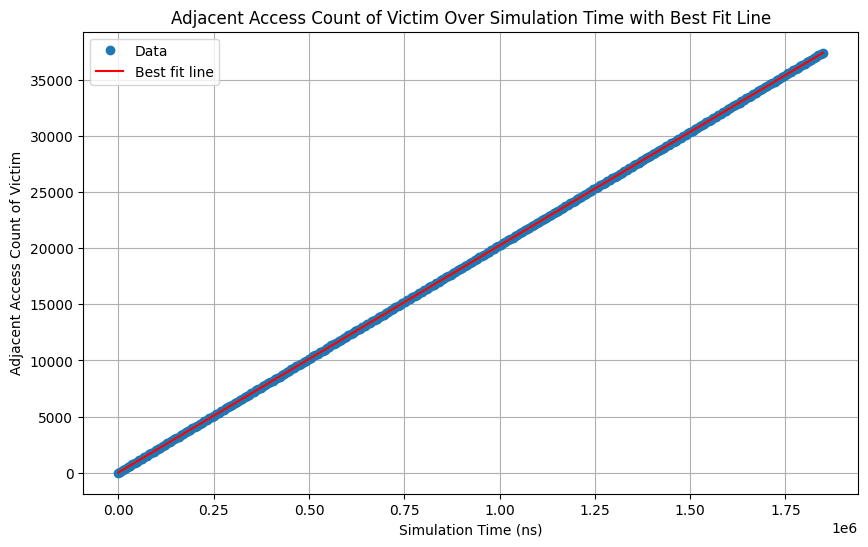

In [17]:
# Extract the columns
x = output_target_row_refresh_range1['simulation_time_ns']
y = output_target_row_refresh_range1['total_access_count']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [18]:
flip_count = output_target_row_refresh_range1['flip_count']
simulation_time_ns = output_target_row_refresh_range1['simulation_time_ns']

for i in range(1, len(flip_count)):
    if flip_count[i - 1] < flip_count[i]:
        print("Flip " + str(flip_count[i]) + " occured at " + str(simulation_time_ns[i]) + " ns")

Flip 1 occured at 404754 ns
Flip 2 occured at 546531 ns
Flip 3 occured at 571889 ns
Flip 4 occured at 834532 ns
Flip 5 occured at 840442 ns


In [19]:
average_access_count_per_refresh_trr1 = output_target_row_refresh_range1['total_access_count'][len(output_target_row_refresh_range1) - 1] / output_target_row_refresh_range1['trr_count'][len(output_target_row_refresh_range1) - 1]
print("Average access count per refresh: " + str(average_access_count_per_refresh_trr1))

Average access count per refresh: 935.3


##### Range 2

Best fitting line: y = 0.020074954032762698 * x + 24.393541695701398


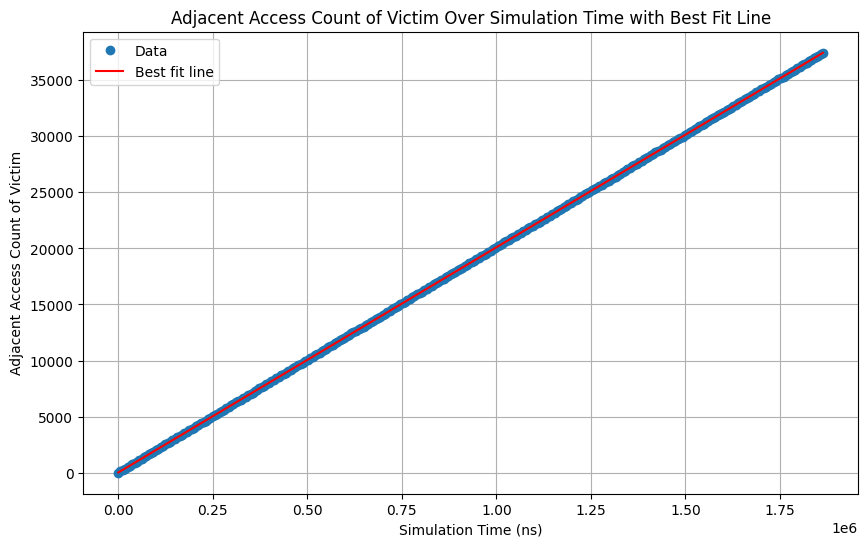

In [20]:
# Extract the columns
x = output_target_row_refresh_range2['simulation_time_ns']
y = output_target_row_refresh_range2['total_access_count']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [21]:
flip_count = output_target_row_refresh_range2['flip_count']
simulation_time_ns = output_target_row_refresh_range2['simulation_time_ns']

for i in range(1, len(flip_count)):
    if flip_count[i - 1] < flip_count[i]:
        print("Flip " + str(flip_count[i]) + " occured at " + str(simulation_time_ns[i]) + " ns")

In [22]:
average_access_count_per_refresh_trr2 = output_target_row_refresh_range2['total_access_count'][len(output_target_row_refresh_range2) - 1] / output_target_row_refresh_range2['trr_count'][len(output_target_row_refresh_range2) - 1]
print("Average access count per refresh: " + str(average_access_count_per_refresh_trr2))

Average access count per refresh: 480.05128205128204


#### Probabilistic Adjacent Row Activation

##### Range 1

Best fitting line: y = 0.02669980982600202 * x + -44.301288835088656


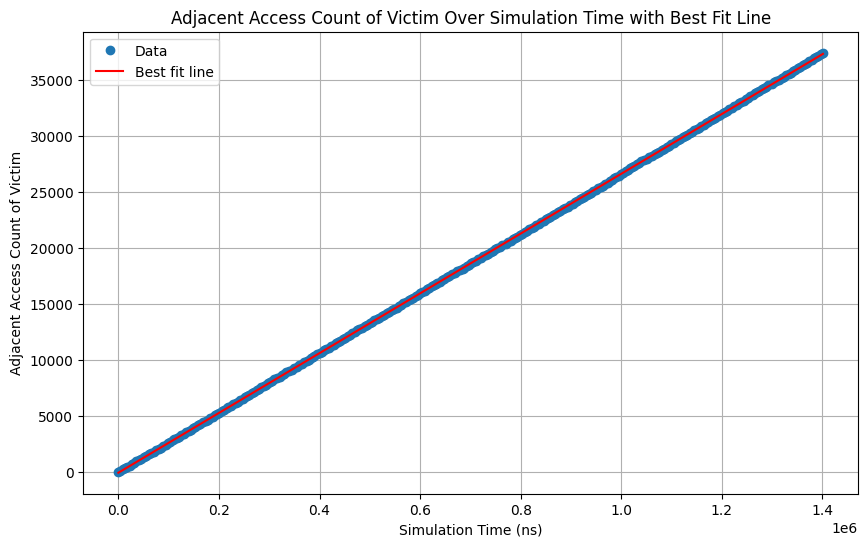

In [23]:
# Extract the columns
x = output_probabilistic_adjacent_row_activation_range1['simulation_time_ns']
y = output_probabilistic_adjacent_row_activation_range1['total_access_count']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [24]:
flip_count = output_probabilistic_adjacent_row_activation_range1['flip_count']
simulation_time_ns = output_probabilistic_adjacent_row_activation_range1['simulation_time_ns']

for i in range(1, len(flip_count)):
    if flip_count[i - 1] < flip_count[i]:
        print("Flip " + str(flip_count[i]) + " occured at " + str(simulation_time_ns[i]) + " ns")

Flip 1 occured at 344623 ns
Flip 2 occured at 400326 ns
Flip 3 occured at 413541 ns
Flip 4 occured at 630842 ns
Flip 5 occured at 634523 ns


In [25]:
average_access_count_per_refresh_para1 = output_probabilistic_adjacent_row_activation_range1['total_access_count'][len(output_probabilistic_adjacent_row_activation_range1) - 1] / output_probabilistic_adjacent_row_activation_range1['para_count'][len(output_probabilistic_adjacent_row_activation_range1) - 1]
print("Average access count per refresh: " + str(average_access_count_per_refresh_para1))

Average access count per refresh: 108.59710144927536


##### Range 2

Best fitting line: y = 0.024270441220401614 * x + -190.9391609320529


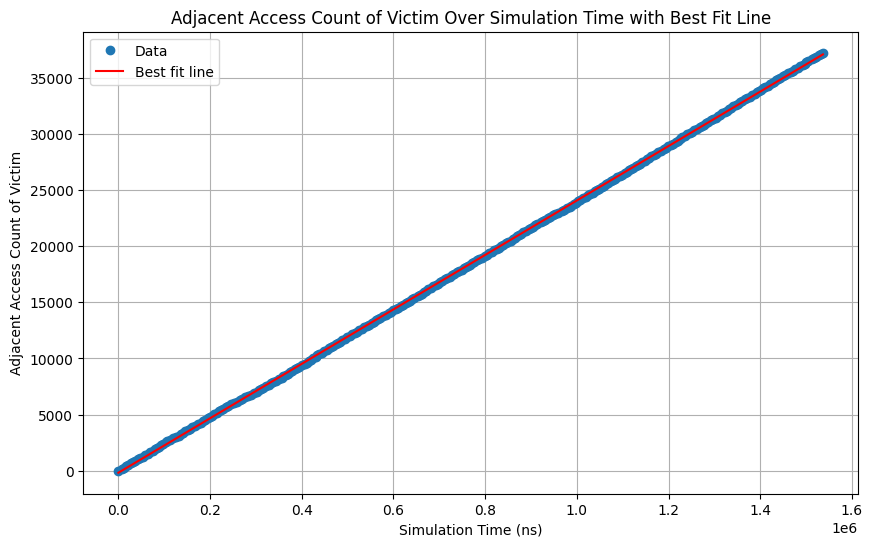

In [26]:
# Extract the columns
x = output_probabilistic_adjacent_row_activation_range2['simulation_time_ns']
y = output_probabilistic_adjacent_row_activation_range2['total_access_count']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [27]:
flip_count = output_probabilistic_adjacent_row_activation_range2['flip_count']
simulation_time_ns = output_probabilistic_adjacent_row_activation_range2['simulation_time_ns']

for i in range(1, len(flip_count)):
    if flip_count[i - 1] < flip_count[i]:
        print("Flip " + str(flip_count[i]) + " occured at " + str(simulation_time_ns[i]) + " ns")

In [28]:
average_access_count_per_refresh_para2 = output_probabilistic_adjacent_row_activation_range2['total_access_count'][len(output_probabilistic_adjacent_row_activation_range2) - 1] / output_probabilistic_adjacent_row_activation_range2['para_count'][len(output_probabilistic_adjacent_row_activation_range2) - 1]
print("Average access count per refresh: " + str(average_access_count_per_refresh_para2))

Average access count per refresh: 50.75476839237057


#### Adaptive Row Activation and Refresh

Best fitting line: y = 0.021954326446163117 * x + -24.85911292422723


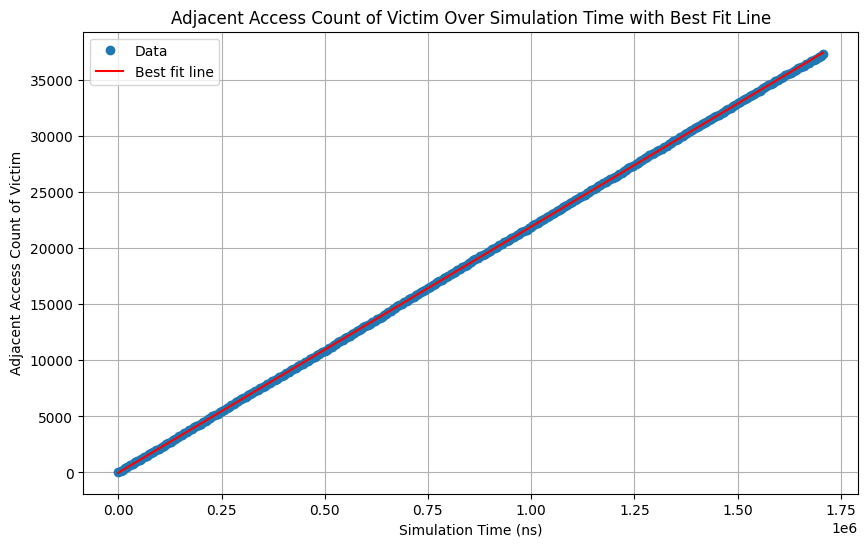

In [29]:
# Extract the columns
x = output_adaptive_row_activation_and_refresh['simulation_time_ns']
y = output_adaptive_row_activation_and_refresh['total_access_count']

# Perform linear regression using polyfit
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit (degree 1)
slope, intercept = coefficients

# Print the line equation
print(f"Best fitting line: y = {slope} * x + {intercept}")

# Create the line chart with the best fit line
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='none', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')

# Add titles and labels
plt.title('Adjacent Access Count of Victim Over Simulation Time with Best Fit Line')
plt.xlabel('Simulation Time (ns)')
plt.ylabel('Adjacent Access Count of Victim')

# Optional: Add grid
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [30]:
flip_count = output_adaptive_row_activation_and_refresh['flip_count']
simulation_time_ns = output_adaptive_row_activation_and_refresh['simulation_time_ns']

for i in range(1, len(flip_count)):
    if flip_count[i - 1] < flip_count[i]:
        print("Flip " + str(flip_count[i]) + " occured at " + str(simulation_time_ns[i]) + " ns")

In [31]:
average_access_count_per_refresh_arar = output_adaptive_row_activation_and_refresh['total_access_count'][len(output_adaptive_row_activation_and_refresh) - 1] / output_adaptive_row_activation_and_refresh['arar_count'][len(output_adaptive_row_activation_and_refresh) - 1]
print("Average access count per refresh: " + str(average_access_count_per_refresh_arar))

Average access count per refresh: 46.49875311720698


### Summary

#### Average access counts per refresh for all mitigations

In [34]:
print("Target Row Refresh (range 1): " + str(average_access_count_per_refresh_trr1))
print("Target Row Refresh (range 2): " + str(average_access_count_per_refresh_trr2))
print("Probabilistic Adjacent Row Activation (range 1): " + str(average_access_count_per_refresh_para1))
print("Probabilistic Adjacent Row Activation (range 2): " + str(average_access_count_per_refresh_para2))
print("Adaptive Row Activation and Refresh: " + str(average_access_count_per_refresh_arar))

Average access counts per refresh for all mitigations:
Target Row Refresh (range 1): 935.3
Target Row Refresh (range 2): 480.05128205128204
Probabilistic Adjacent Row Activation (range 1): 108.59710144927536
Probabilistic Adjacent Row Activation (range 2): 50.75476839237057
Adaptive Row Activation and Refresh: 46.49875311720698


#### Average time per access for all mitigations

In [ ]:
print(output_no_mitigation['time_in_ns'][len(output_no_mitigation) - 1] / output_no_mitigation['total_access_count'][len(output_no_mitigation) - 1])